# Labs Access Analysis: 03 City Map

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium
from matplotlib.patches import Patch

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [2]:
# Load data, json
with open('data/isochrones.json') as json_file:
    data = json.load(json_file)

In [3]:
# Load data, csv
labs = pd.read_csv('data/labs.csv')

In [4]:
labs

Name  \
0                                   Fab Lab Barcelona   
1                           MADE Makerspace Barcelona   
2                                           Soko Tech   
3                                           LSCongres   
4                                       Green Fab Lab   
..                                                ...   
67                                   Fundació Avismón   
68  Elisava, Barcelona School of Design and Engine...   
69  HP 3D Printing and Digital Manufacturing Cente...   
70                                       3D Incubator   
71                                       Fundació CIM   

                             Type                   City Cluster  \
0                         Fab Lab              Barcelona     BCN   
1                         Fab Lab              Barcelona     BCN   
2                         Fab Lab              Barcelona     BCN   
3                         Fab Lab              Barcelona     BCN   
4                         Fab Lab  Cerdanyola del Vallès     BCN   
..                            ...                    ...     ...   
67                     Foundation              Barcelona     BCN   
68                 University Lab              Barcelona     BCN   
69               Industry R&D Lab  Sant Cugat del Valles     BCN   
70          Incubator/Accelerator              Barcelona     BCN   
71  University + Industry R&D Lab              Barcelona     BCN   

                                              Address     CAP        Lat  \
0                              Carrer de Pujades, 102  8005.0  41.396925   
1                      Carrer Noguera Pallaresa 59-61  8014.0  41.373238   
2                        Carrer de Vallès i Ribot, 36  8027.0  41.424535   
3                  Carrer del Cardenal Tedeschini, 50  8027.0  41.426002   
4              Ctra. BV-1415 (Horta-Cerdanyola), km 7  8290.0  41.450394   
..                                                ...     ...        ...   
67                       Carrer dels Jocs Florals, 59  8014.0  41.374107   
68                                    La Rambla 30-32  8002.0  41.378679   
69              Cami de Can Graells 1-21 (Bldg BCN01)  8174.0  41.493650   
70  Polígono Industrial de la, Avinguda Parc Logís...  8040.0  41.340036   
71                            C/ Llorens i Artigas 12  8028.0  41.383342   

        Long                                             Source  \
0   2.194335                                         Fablabs.io   
1   2.141084  Fablabs.io, Hackerspaces.org, Makerspaces.make.co   
2   2.188883                                         Fablabs.io   
3   2.182026                                         Fablabs.io   
4   2.133441                                         Fablabs.io   
..       ...                                                ...   
67  2.134948            Ajuntament de Barcelona policy document   
68  2.176560                                     Manually added   
69  2.062887                                     Manually added   
70  2.123036                                     Manually added   
71  2.116431                                     Manually added   

                                                  URL Notes  
0                              https://fablabbcn.org/   NaN  
1                                                 NaN   NaN  
2                                  https://soko.tech/   NaN  
3                   https://fablabs.io/labs/lscongres   NaN  
4                                                 NaN   NaN  
..                                                ...   ...  
67                            http://www.avismon.org/   NaN  
68   https://www.elisava.net/en/our-spaces/facilities   NaN  
69  https://press.hp.com/us/en/press-releases/2019...   NaN  
70                       https://www.incubator3d.org/   NaN  
71                           https://fundaciocim.org/   NaN  

[72 rows x 11 columns]

In [5]:
searchfor = ['Barcelona', 'Milan']
city_labs = labs[labs.City.str.contains('|'.join(searchfor))]

In [6]:
city_labs

Name  \
0                                   Fab Lab Barcelona   
1                           MADE Makerspace Barcelona   
2                                           Soko Tech   
3                                           LSCongres   
5                              Barcelona Mobility LAB   
..                                                ...   
66                                    Fundació Comtal   
67                                   Fundació Avismón   
68  Elisava, Barcelona School of Design and Engine...   
70                                       3D Incubator   
71                                       Fundació CIM   

                             Type       City Cluster  \
0                         Fab Lab  Barcelona     BCN   
1                         Fab Lab  Barcelona     BCN   
2                         Fab Lab  Barcelona     BCN   
3                         Fab Lab  Barcelona     BCN   
5                         Fab Lab  Barcelona     BCN   
..                            ...        ...     ...   
66                     Foundation  Barcelona     BCN   
67                     Foundation  Barcelona     BCN   
68                 University Lab  Barcelona     BCN   
70          Incubator/Accelerator  Barcelona     BCN   
71  University + Industry R&D Lab  Barcelona     BCN   

                                              Address     CAP        Lat  \
0                              Carrer de Pujades, 102  8005.0  41.396925   
1                      Carrer Noguera Pallaresa 59-61  8014.0  41.373238   
2                        Carrer de Vallès i Ribot, 36  8027.0  41.424535   
3                  Carrer del Cardenal Tedeschini, 50  8027.0  41.426002   
5              Passatge del Torrent de l'Estadella 56  8030.0  41.432152   
..                                                ...     ...        ...   
66                         Carrer Forn de la Fonda, 5  8003.0  41.386901   
67                       Carrer dels Jocs Florals, 59  8014.0  41.374107   
68                                    La Rambla 30-32  8002.0  41.378679   
70  Polígono Industrial de la, Avinguda Parc Logís...  8040.0  41.340036   
71                            C/ Llorens i Artigas 12  8028.0  41.383342   

        Long                                             Source  \
0   2.194335                                         Fablabs.io   
1   2.141084  Fablabs.io, Hackerspaces.org, Makerspaces.make.co   
2   2.188883                                         Fablabs.io   
3   2.182026                                         Fablabs.io   
5   2.199793                                         Fablabs.io   
..       ...                                                ...   
66  2.179529            Ajuntament de Barcelona policy document   
67  2.134948            Ajuntament de Barcelona policy document   
68  2.176560                                     Manually added   
70  2.123036                                     Manually added   
71  2.116431                                     Manually added   

                                                 URL Notes  
0                             https://fablabbcn.org/   NaN  
1                                                NaN   NaN  
2                                 https://soko.tech/   NaN  
3                  https://fablabs.io/labs/lscongres   NaN  
5                                                NaN   NaN  
..                                               ...   ...  
66                               https://comtal.org/   NaN  
67                           http://www.avismon.org/   NaN  
68  https://www.elisava.net/en/our-spaces/facilities   NaN  
70                      https://www.incubator3d.org/   NaN  
71                          https://fundaciocim.org/   NaN  

[63 rows x 11 columns]

In [7]:
closed_labs = city_labs[city_labs.Notes.str.contains("losed")==True]
city_labs = city_labs[~city_labs.index.isin(closed_labs.index)]

In [8]:
city_labs

Name  \
0                                   Fab Lab Barcelona   
1                           MADE Makerspace Barcelona   
2                                           Soko Tech   
3                                           LSCongres   
5                              Barcelona Mobility LAB   
8                          The FabLab: Make in Milano   
9                                 Vectorealism FabLab   
10                                          DamASpace   
11            Miocugino - officina di gesta e ingegno   
12                                            Opendot   
13                                        Polifactory   
14                         WeMake | Makerspace Fablab   
15                                     FabLab Ventura   
16                        FabLabMilano - Fare le Idee   
20                         Politecnico Open unix Labs   
21                                             Danaus   
22                               AKASHA Hub Barcelona   
25                                  DIY Bio Barcelona   
26                                      Maker Convent   
28                     Ateneu de Fabricació Les Corts   
29            Ateneu de Fabricació La Fàbrica del Sol   
30              Ateneu de Fabricació Ciutat Meridiana   
31               Ateneu de Fabricació Parc Tecnológic   
32                        Ateneu de Fabricació Gràcia   
34                    Ateneu de Fabricació Ca L'Alier   
35                   Punt Multimedia FAB Casa del Mig   
36                          Punt Multimedia La Marina   
37  Club Maker de l'American Space - Biblioteca Fa...   
38                                    Makers Zone BCN   
39                                  FabCafé Barcelona   
40                                               TMDC   
43                                             ATTA33   
44                                             Kinlab   
45                                         SuperForma   
46                                         Makers Hub   
47                                   Milano Luiss Hub   
48                                              YATTA   
49                                RavalFab / Colectic   
51                                      IED Maker Lab   
52  Punt Òmnia Casal Cívic Barcelona - Verdum - Fu...   
53                      IAM3DHUB / Dfactory Barcelona   
54                       Locanda Officina Monumentale   
55                                  Ideas Bit Factory   
56                                   Share Makerspace   
57                                          Recipient   
58                                      Camins Makers   
60                              Racó.net del Guinardó   
61                            Espai Jove Casa Sagnier   
62                          EASD Llotja - Sant Andreu   
63                                           Canodrom   
64                             Cibernàrium Nou Barris   
65                                    Cibernàrium 22@   
66                                    Fundació Comtal   
67                                   Fundació Avismón   
68  Elisava, Barcelona School of Design and Engine...   
70                                       3D Incubator   
71                                       Fundació CIM   

                             Type             City Cluster  \
0                         Fab Lab        Barcelona     BCN   
1                         Fab Lab        Barcelona     BCN   
2                         Fab Lab        Barcelona     BCN   
3                         Fab Lab        Barcelona     BCN   
5                         Fab Lab        Barcelona     BCN   
8                         Fab Lab            Milan      MI   
9                         Service            Milan      MI   
10                        Fab Lab            Milan      MI   
11                     Makerspace            Milan      MI   
12                        Fab Lab            Milan      MI   
13                 University Lab            Milan      MI  

In [9]:
locations = {}
for i in data:
    if (i['name'] in city_labs["Name"].values):
        locations[i['name']] = i['metadata']['query']['locations'][0]

In [10]:
# Remove the metropolital labs from the isochrones data
for i in data:
    if (i['name'] not in city_labs["Name"].values):
        print("Removed",i['name'])
        data.remove(i)
        
# One lab is not removed at first iteration??
for i in data:
    if (i['name'] not in city_labs["Name"].values):
        print("Removed",i['name'])
        data.remove(i)

Removed Green Fab Lab
Removed Fab Lab Sant Cugat
Removed Multilab Rozzano
Removed W!LAB
Removed Disseny Lab UAB
Removed BDN Lab
Removed EspluLab
Removed HP 3D Printing and Digital Manufacturing Center of Excellence
Removed Fab Lab Tinkerers


## Map Visualization

In [11]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [12]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [13]:
m

In [14]:
rows = []
for h in data:
    if (h['name'] in city_labs["Name"].values):
        rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [15]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

Name  total_pop        area  reachfactor  \
0          Fab Lab Barcelona    90862.0  4444783.82       0.9055   
1  MADE Makerspace Barcelona    87403.0  4378946.71       0.8921   
2                  Soko Tech    91433.0  4353937.57       0.8870   
3                  LSCongres    95371.0  4497971.38       0.9163   
4     Barcelona Mobility LAB    14029.0   663848.58       0.1352   

                                            geometry isochrone  
0  [[[2.181516, 41.395308], [2.181969, 41.39116],...        []  
1  [[[2.127469, 41.374827], [2.128559, 41.368987]...        []  
2  [[[2.174851, 41.424714], [2.174888, 41.423775]...        []  
3  [[[2.167014, 41.427727], [2.16735, 41.426536],...        []  
4  [[[2.194385, 41.435171], [2.194398, 41.435131]...        []

In [16]:
# Transform the areas in square km
map_data["area"] = map_data["area"] / 1000000.0

In [17]:
# Create a flip isochrone cell for each lab
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [18]:
map_data.set_index('Name', inplace=True)
city_labs.set_index('Name', inplace=True)

In [19]:
# Add columns from the .csv to the .json
full_map_data = map_data.join(city_labs)

In [20]:
full_map_data

total_pop      area  \
Name                                                                      
Fab Lab Barcelona                                     90862.0  4.444784   
MADE Makerspace Barcelona                             87403.0  4.378947   
Soko Tech                                             91433.0  4.353938   
LSCongres                                             95371.0  4.497971   
Barcelona Mobility LAB                                14029.0  0.663849   
The FabLab: Make in Milano                            40656.0  3.753146   
Vectorealism FabLab                                   25520.0  2.833731   
DamASpace                                             58690.0  4.808371   
Miocugino - officina di gesta e ingegno               39458.0  3.803093   
Opendot                                               56951.0  4.261113   
Polifactory                                           30621.0  3.349134   
WeMake | Makerspace Fablab                            40222.0  2.986932   
FabLab Ventura                                        23228.0  3.911166   
FabLabMilano - Fare le Idee                           23848.0  2.591211   
Politecnico Open unix Labs                            61851.0  3.933258   
Danaus                                               100054.0  4.821324   
AKASHA Hub Barcelona                                  96774.0  4.579291   
DIY Bio Barcelona                                     99832.0  4.530756   
Maker Convent                                         87482.0  4.390605   
Ateneu de Fabricació Les Corts                        88373.0  4.220194   
Ateneu de Fabricació La Fàbrica del Sol               47179.0  2.690404   
Ateneu de Fabricació Ciutat Meridiana                 11587.0  1.595240   
Ateneu de Fabricació Parc Tecnológic                  83897.0  4.256092   
Ateneu de Fabricació Gràcia                           97329.0  4.525925   
Ateneu de Fabricació Ca L'Alier                       93219.0  4.520822   
Punt Multimedia FAB Casa del Mig                      91882.0  4.322194   
Punt Multimedia La Marina                             65902.0  3.656017   
Club Maker de l'American Space - Biblioteca Fab...    86930.0  4.165422   
Makers Zone BCN                                       86670.0  4.483145   
FabCafé Barcelona                                     89397.0  4.435223   
TMDC                                                  60612.0  3.168386   
ATTA33                                                94386.0  4.683627   
Kinlab                                                50314.0  4.262958   
SuperForma                                            57463.0  4.482719   
Makers Hub                                            20545.0  3.117753   
Milano Luiss Hub                                      46495.0  4.302234   
YATTA                                                 40301.0  3.704286   
RavalFab / Colectic                                  101992.0  4.732586   
IED Maker Lab                                         90686.0  4.441083   
Punt Òmnia Casal Cívic Barcelona - Verdum - Fun...    69354.0  3.782753   
IAM3DHUB / Dfactory Barcelona                         28808.0  1.150408   
Locanda Officina Monumentale                          33427.0  2.533031   
Ideas Bit Factory                                     33088.0  3.803688   
Share Makerspace                                      11656.0  2.355878   
Recipient                                             30996.0  3.294317   
Camins Makers                                         61277.0  3.549940   
Racó.net del Guinardó                                 91676.0  4.589406   
Espai Jove Casa Sagnier                               94316.0  4.550876   
EASD Llotja - Sant Andreu                             80707.0  3.698952   
Canodrom                                              95440.0  4.447291   
Cibernàrium Nou Barris                                82690.0  4.286698   
Cibernàrium 22@                                       94265.0  4.338036   
Fu

## Population reached

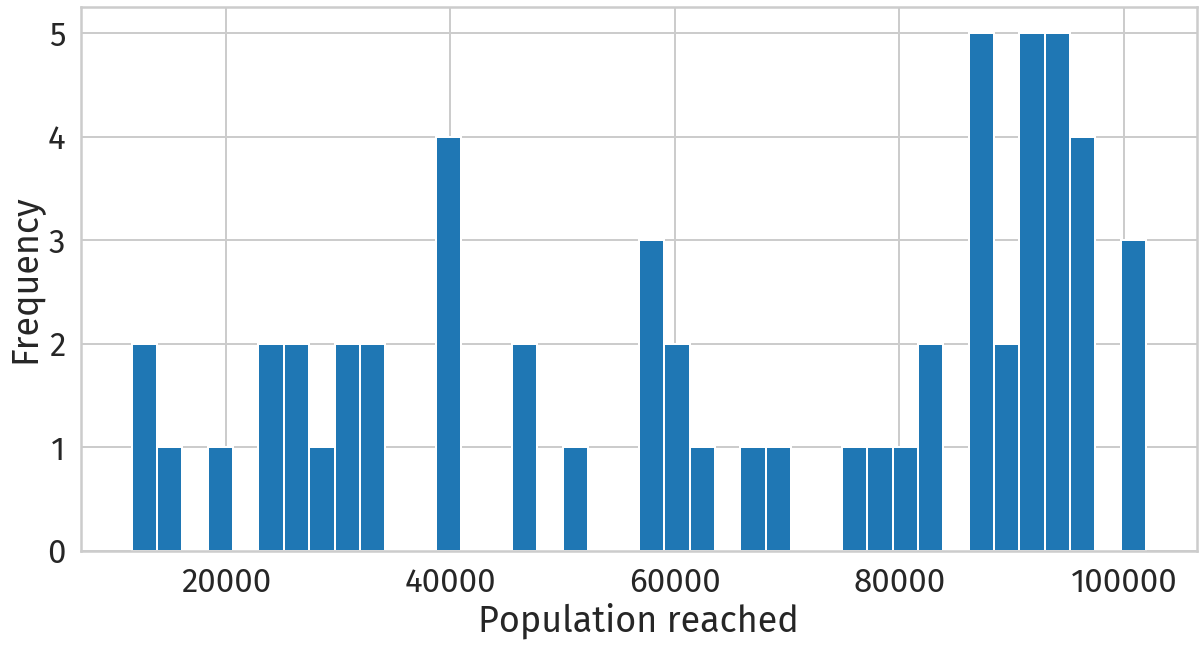

In [21]:
# Plot the data
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/city_labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_hist.png", dpi=300, bbox_inches="tight")

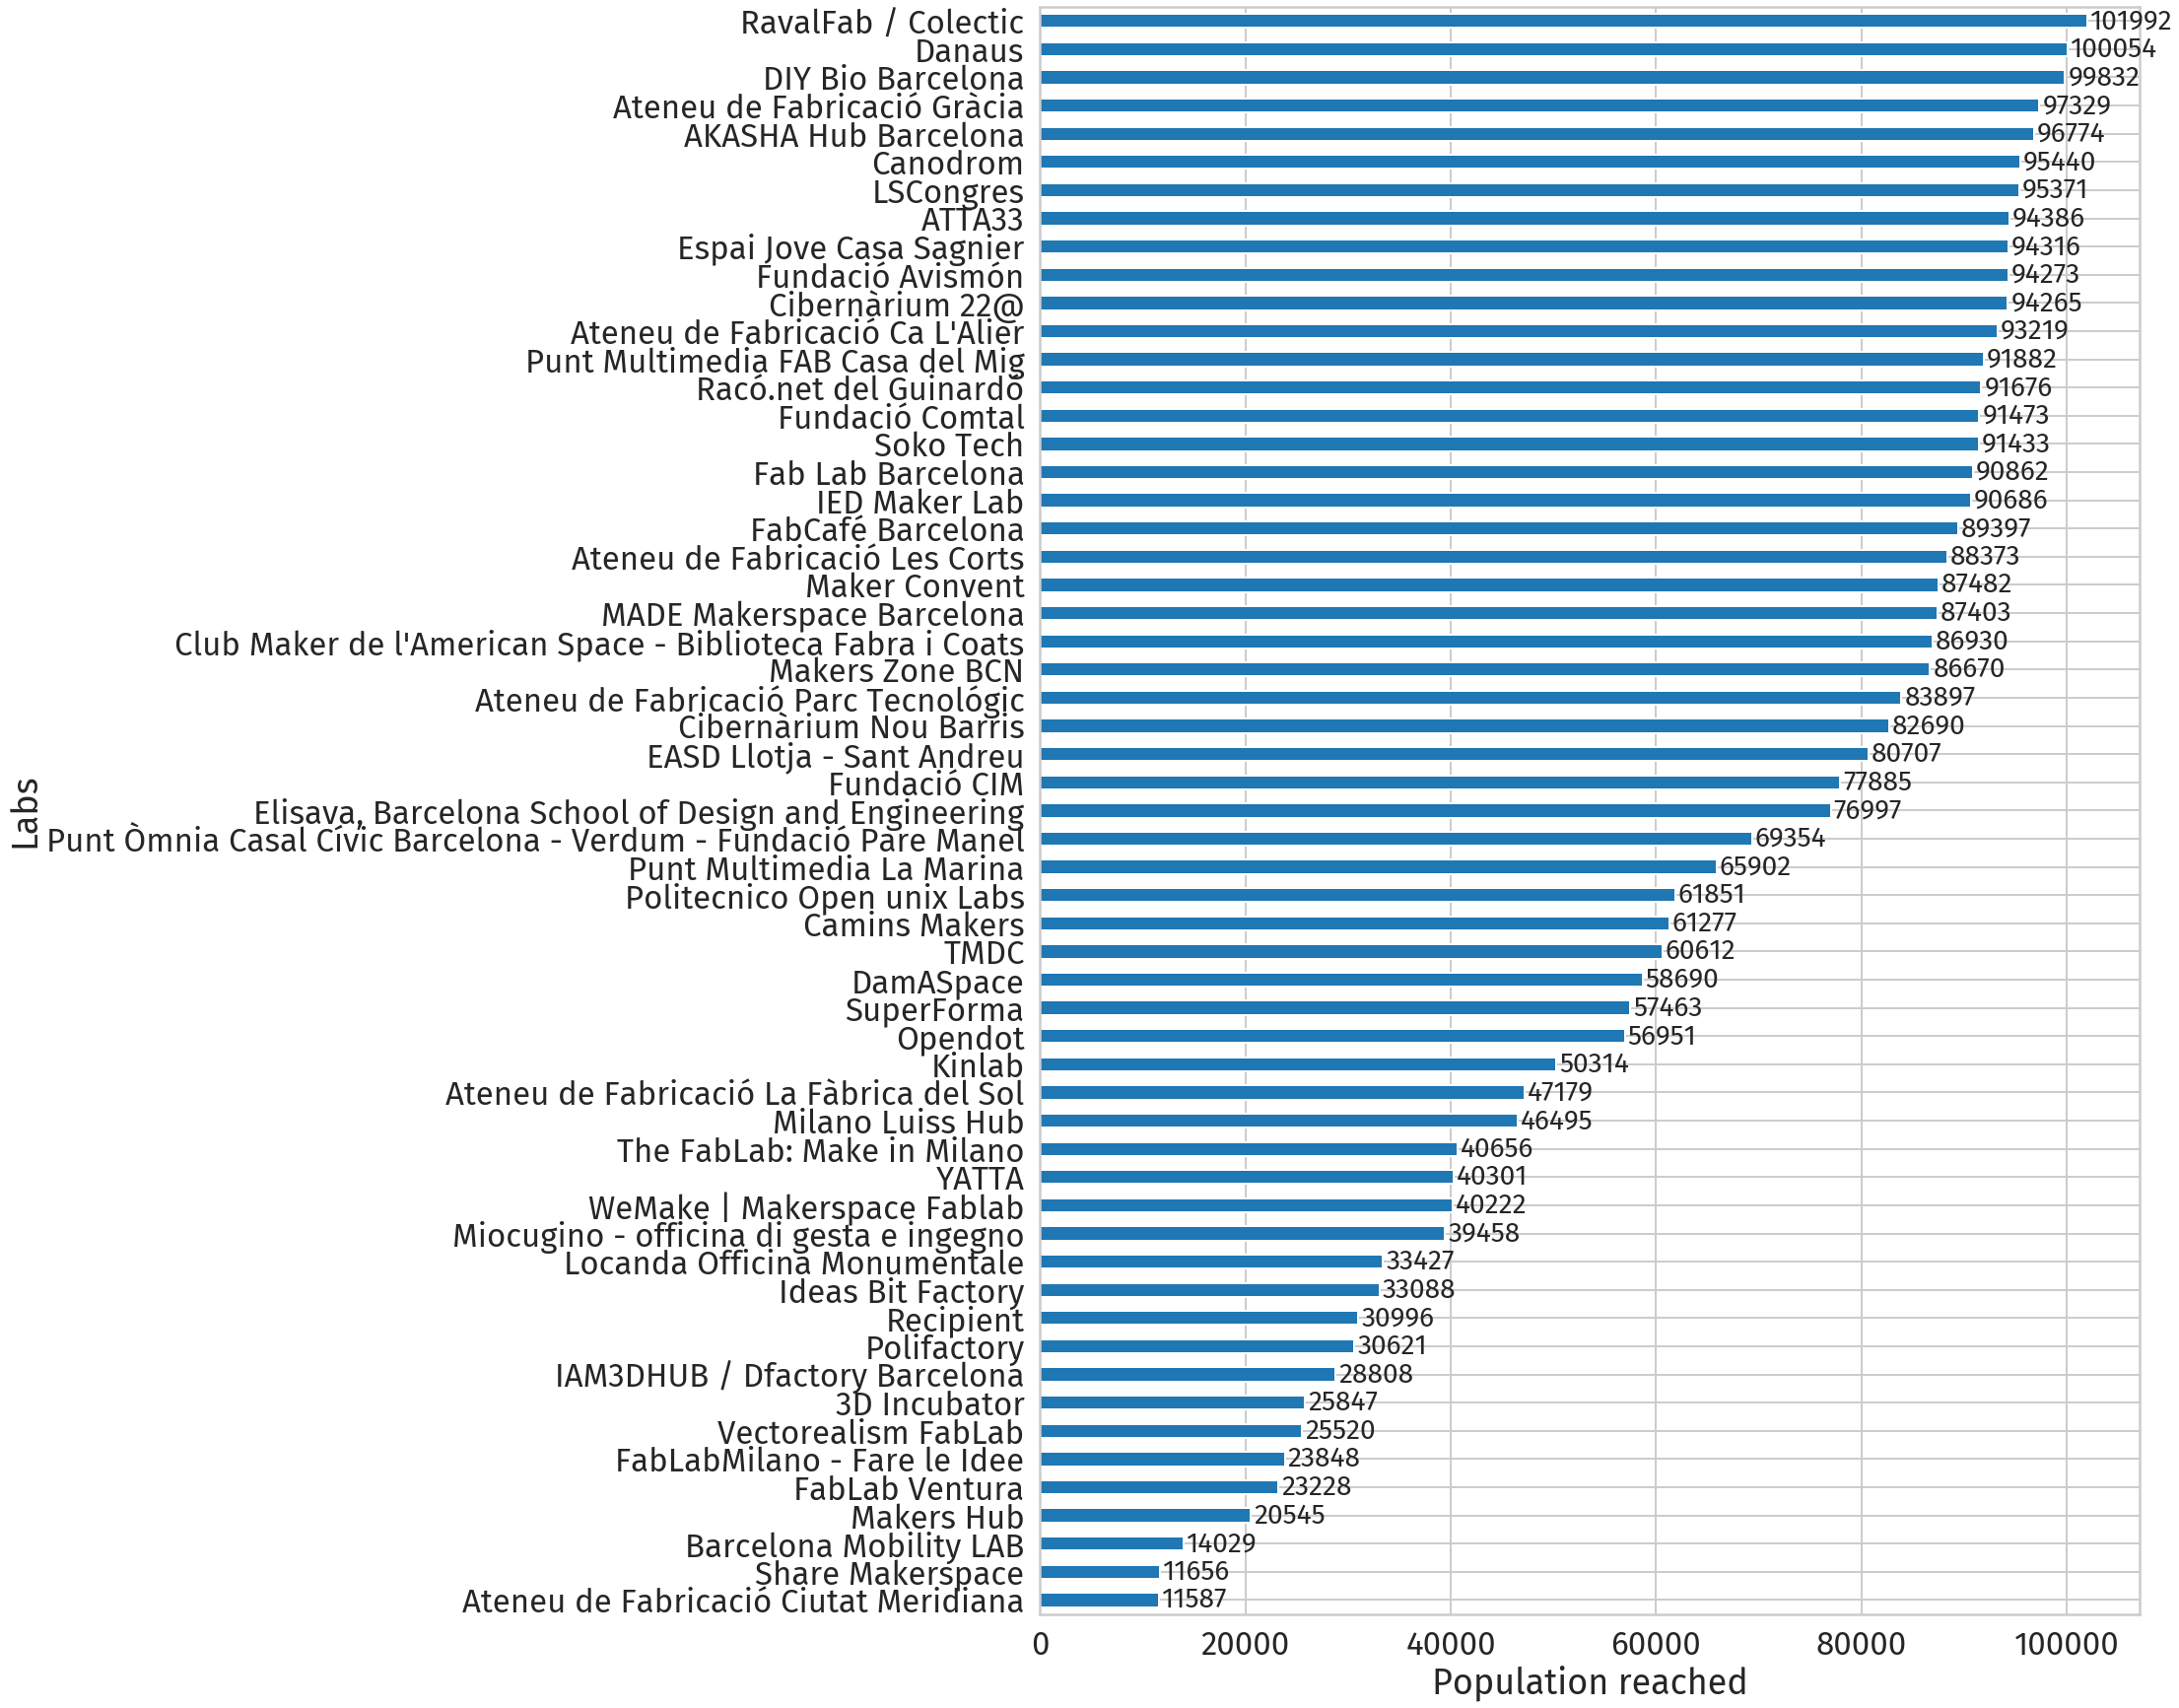

In [22]:
# Plot the data
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_bar.png", dpi=300, bbox_inches="tight")

## Area reached

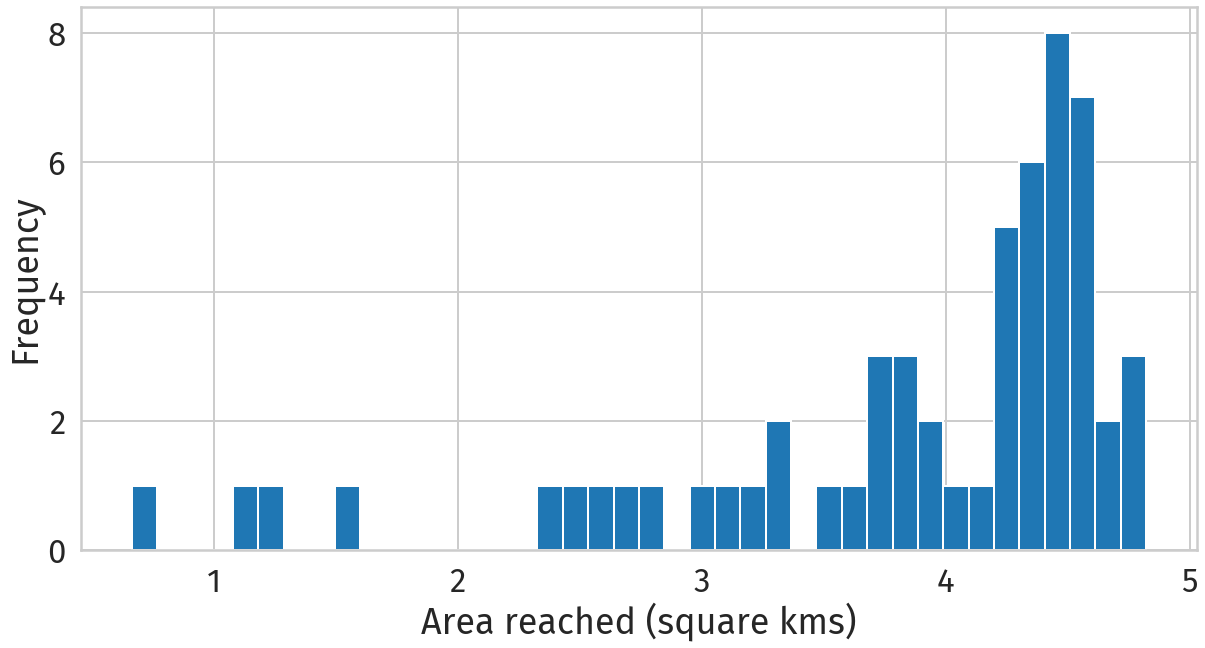

In [23]:
# Plot the data
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached (square kms)')
plt.savefig("svg/city_labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_hist.png", dpi=300, bbox_inches="tight")

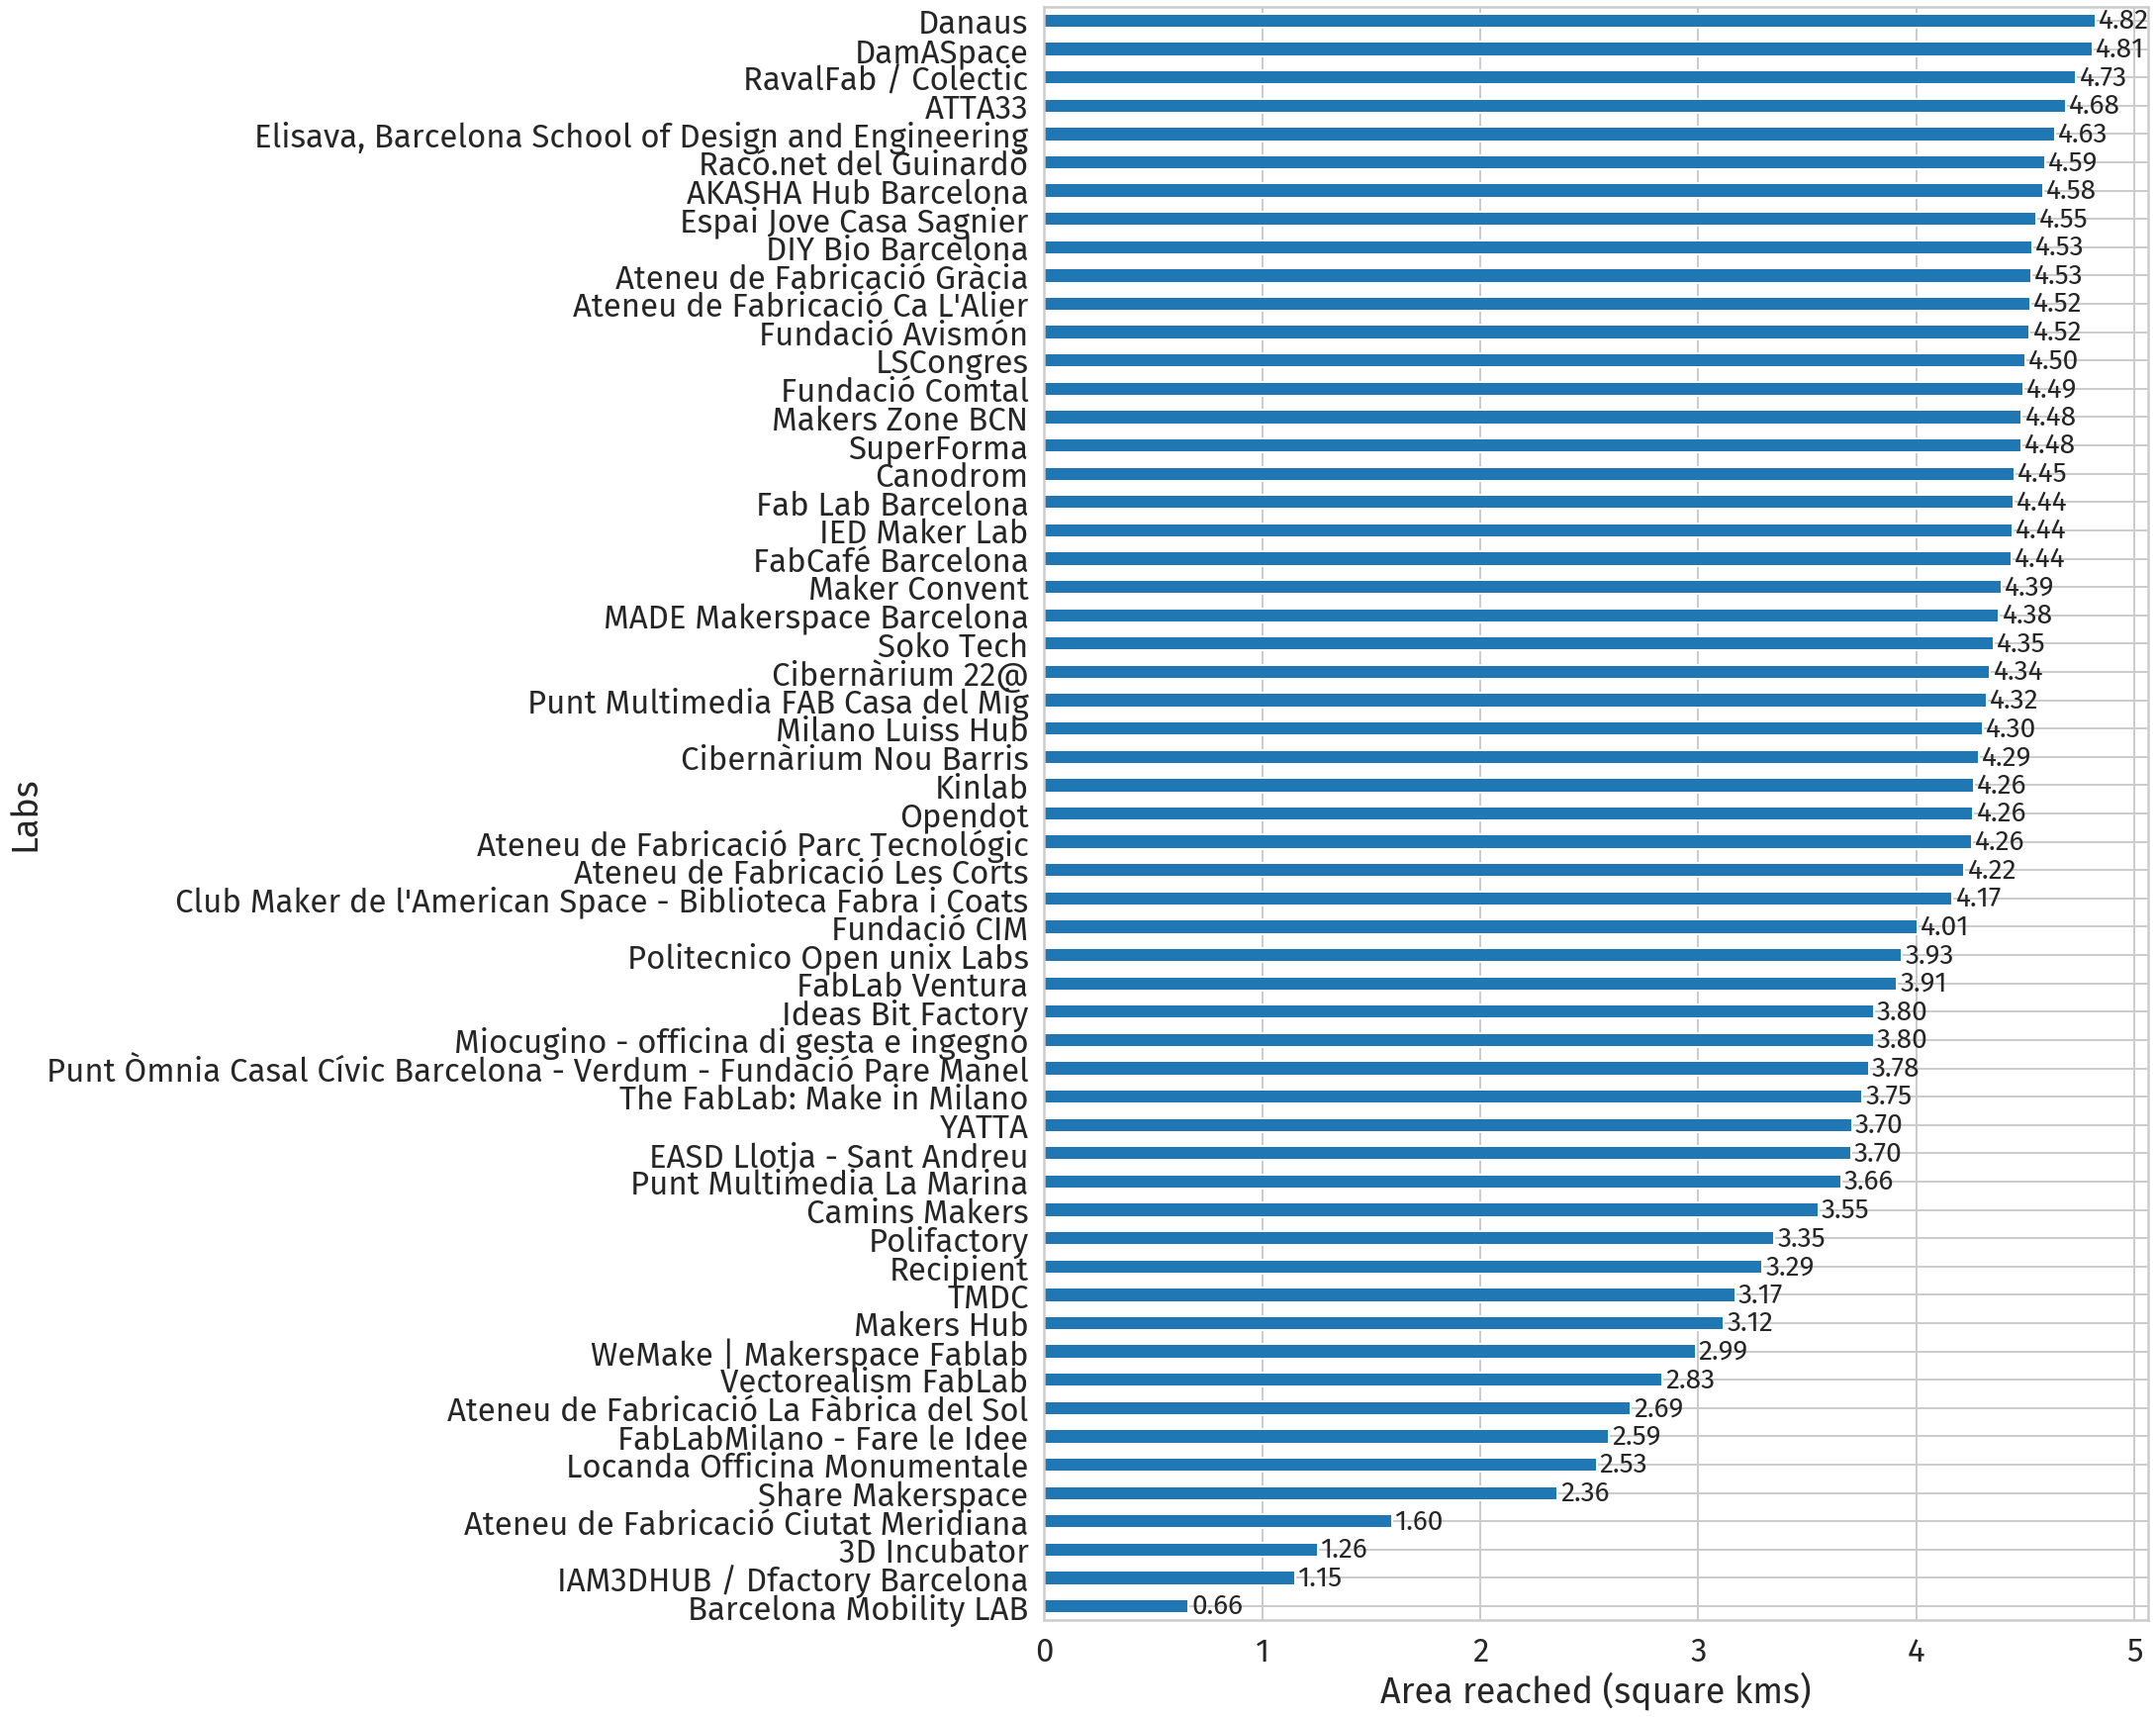

In [24]:
# Plot the data
ax = map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_bar.png", dpi=300, bbox_inches="tight")

## Reach Factor

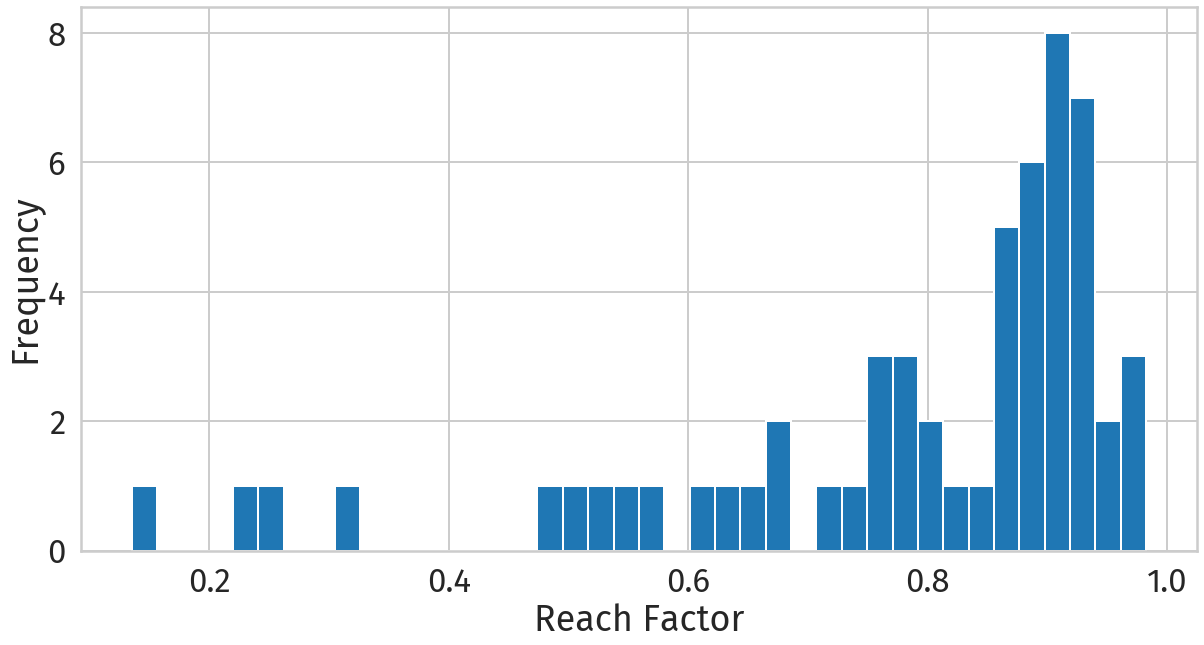

In [25]:
# Plot the data
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg/city_labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

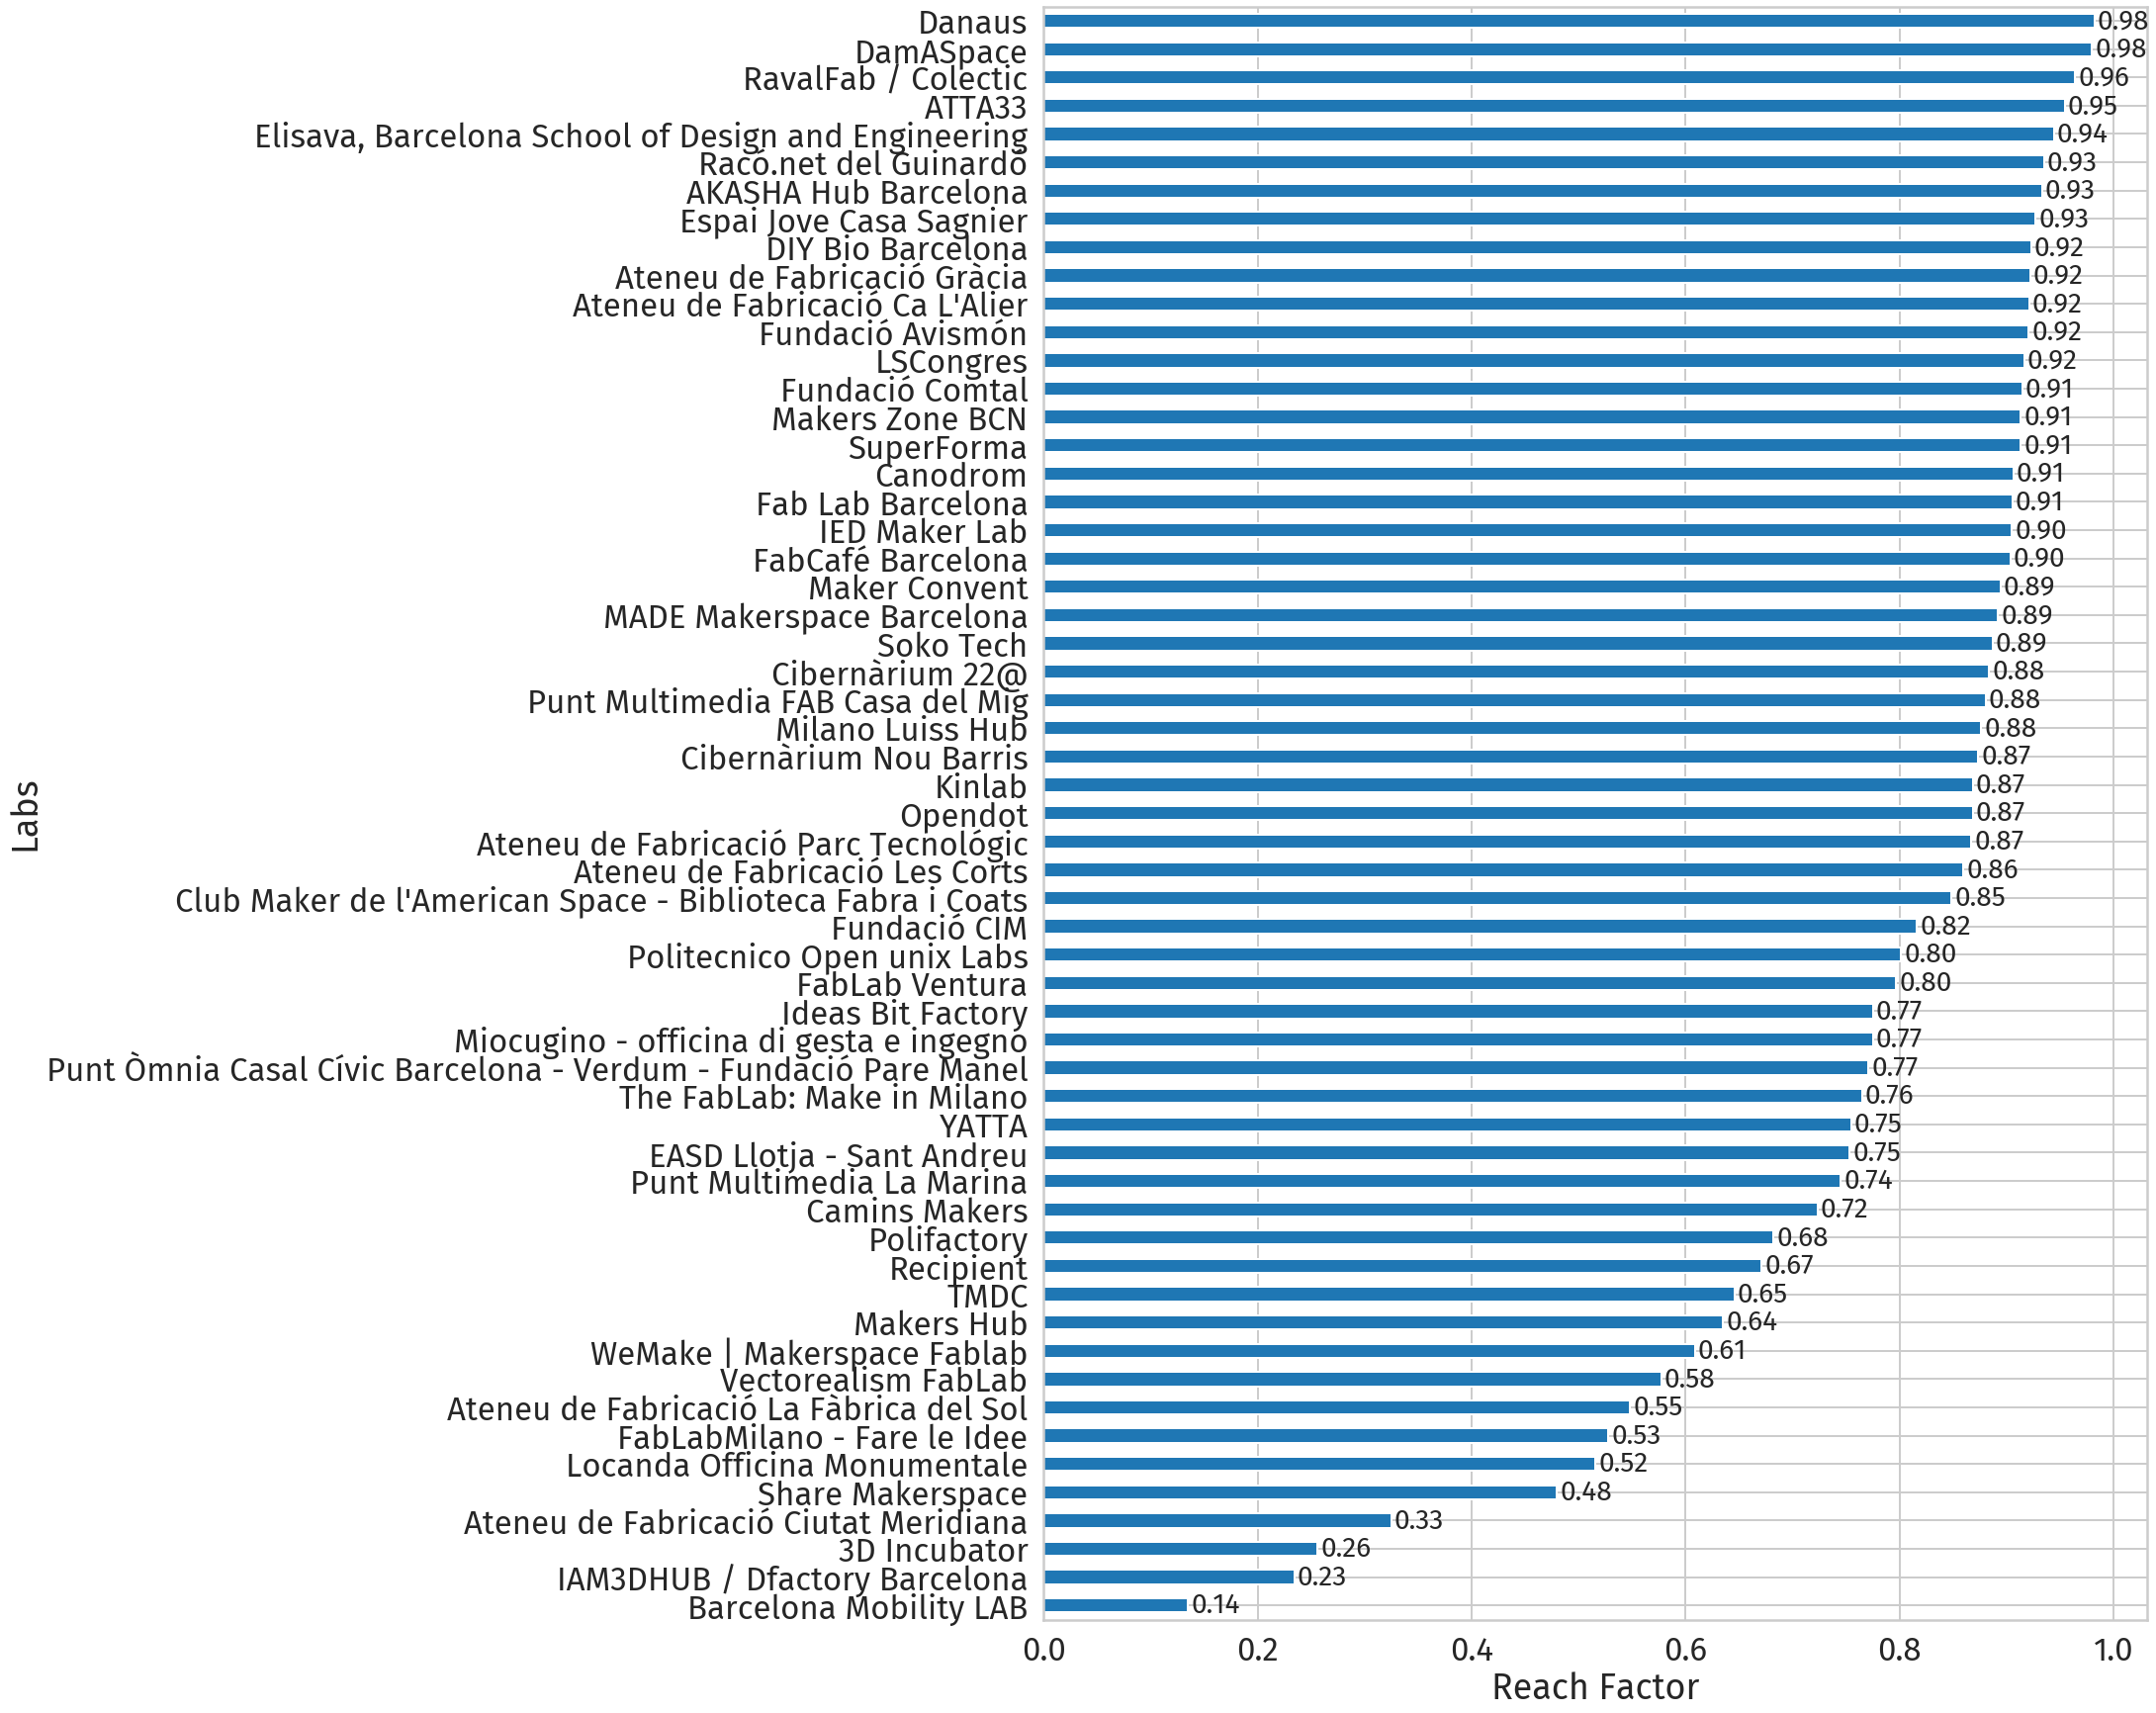

In [26]:
# Plot the data
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,30))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

## Labs values clustered by city

In [27]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                         
BCN      Ateneu de Fabricació             6
         City Space                       6
         DIYBio Lab                       1
         Fab Lab                          6
         FabCafé                          1
         Foundation                       2
         Hackerspace                      2
         Incubator/Accelerator            4
         Library                          1
         Makerspace                       3
         Service                          1
         University + Industry R&D Lab    1
         University Lab                   4
MI       DIYBio Lab                       1
         Fab Lab                          6
         Hackerspace                      1
         Incubator/Accelerator            1
         Makerspace                       6
         Service                          3
         University Lab                   1
dtype: int64

In [28]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    3018289.0
MI      725330.0
Name: total_pop, dtype: float64

In [29]:
full_map_data.groupby("Cluster")["total_pop"].describe()

count          mean           std      min      25%      50%  \
Cluster                                                                 
BCN       38.0  79428.657895  23930.348061  11587.0  77219.0  88885.0   
MI        19.0  38175.263158  14335.258843  11656.0  28070.5  39458.0   

             75%       max  
Cluster                     
BCN      94271.0  101992.0  
MI       48404.5   61851.0

In [30]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    149.856741
MI      68.088019
Name: area, dtype: float64

In [31]:
full_map_data.groupby("Cluster")["area"].describe()

count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
BCN       38.0  3.943598  1.063282  0.663849  3.838327  4.384776  4.520540   
MI        19.0  3.583580  0.706508  2.355878  3.052343  3.753146  4.097185   

              max  
Cluster            
BCN      4.821324  
MI       4.808371

In [32]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

count      mean       std     min       25%      50%       75%  \
Cluster                                                                   
BCN       38.0  0.803379  0.216601  0.1352  0.781925  0.89325  0.920925   
MI        19.0  0.730042  0.143935  0.4799  0.621800  0.76460  0.834700   

            max  
Cluster          
BCN      0.9822  
MI       0.9796

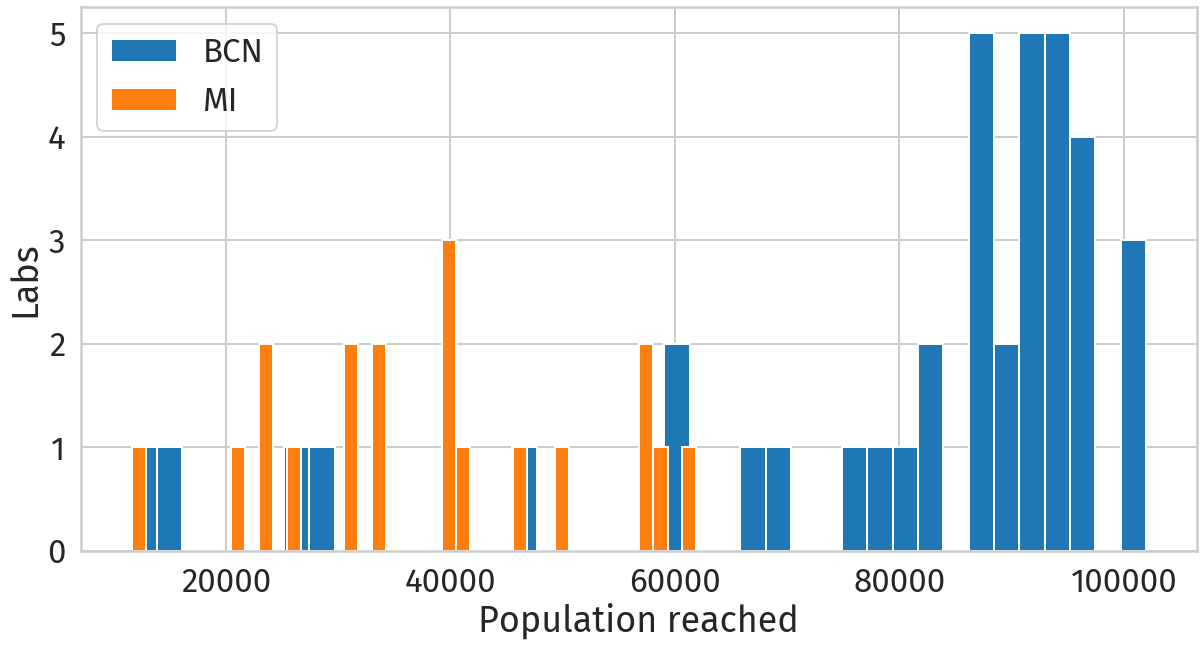

In [33]:
# Plot the data
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

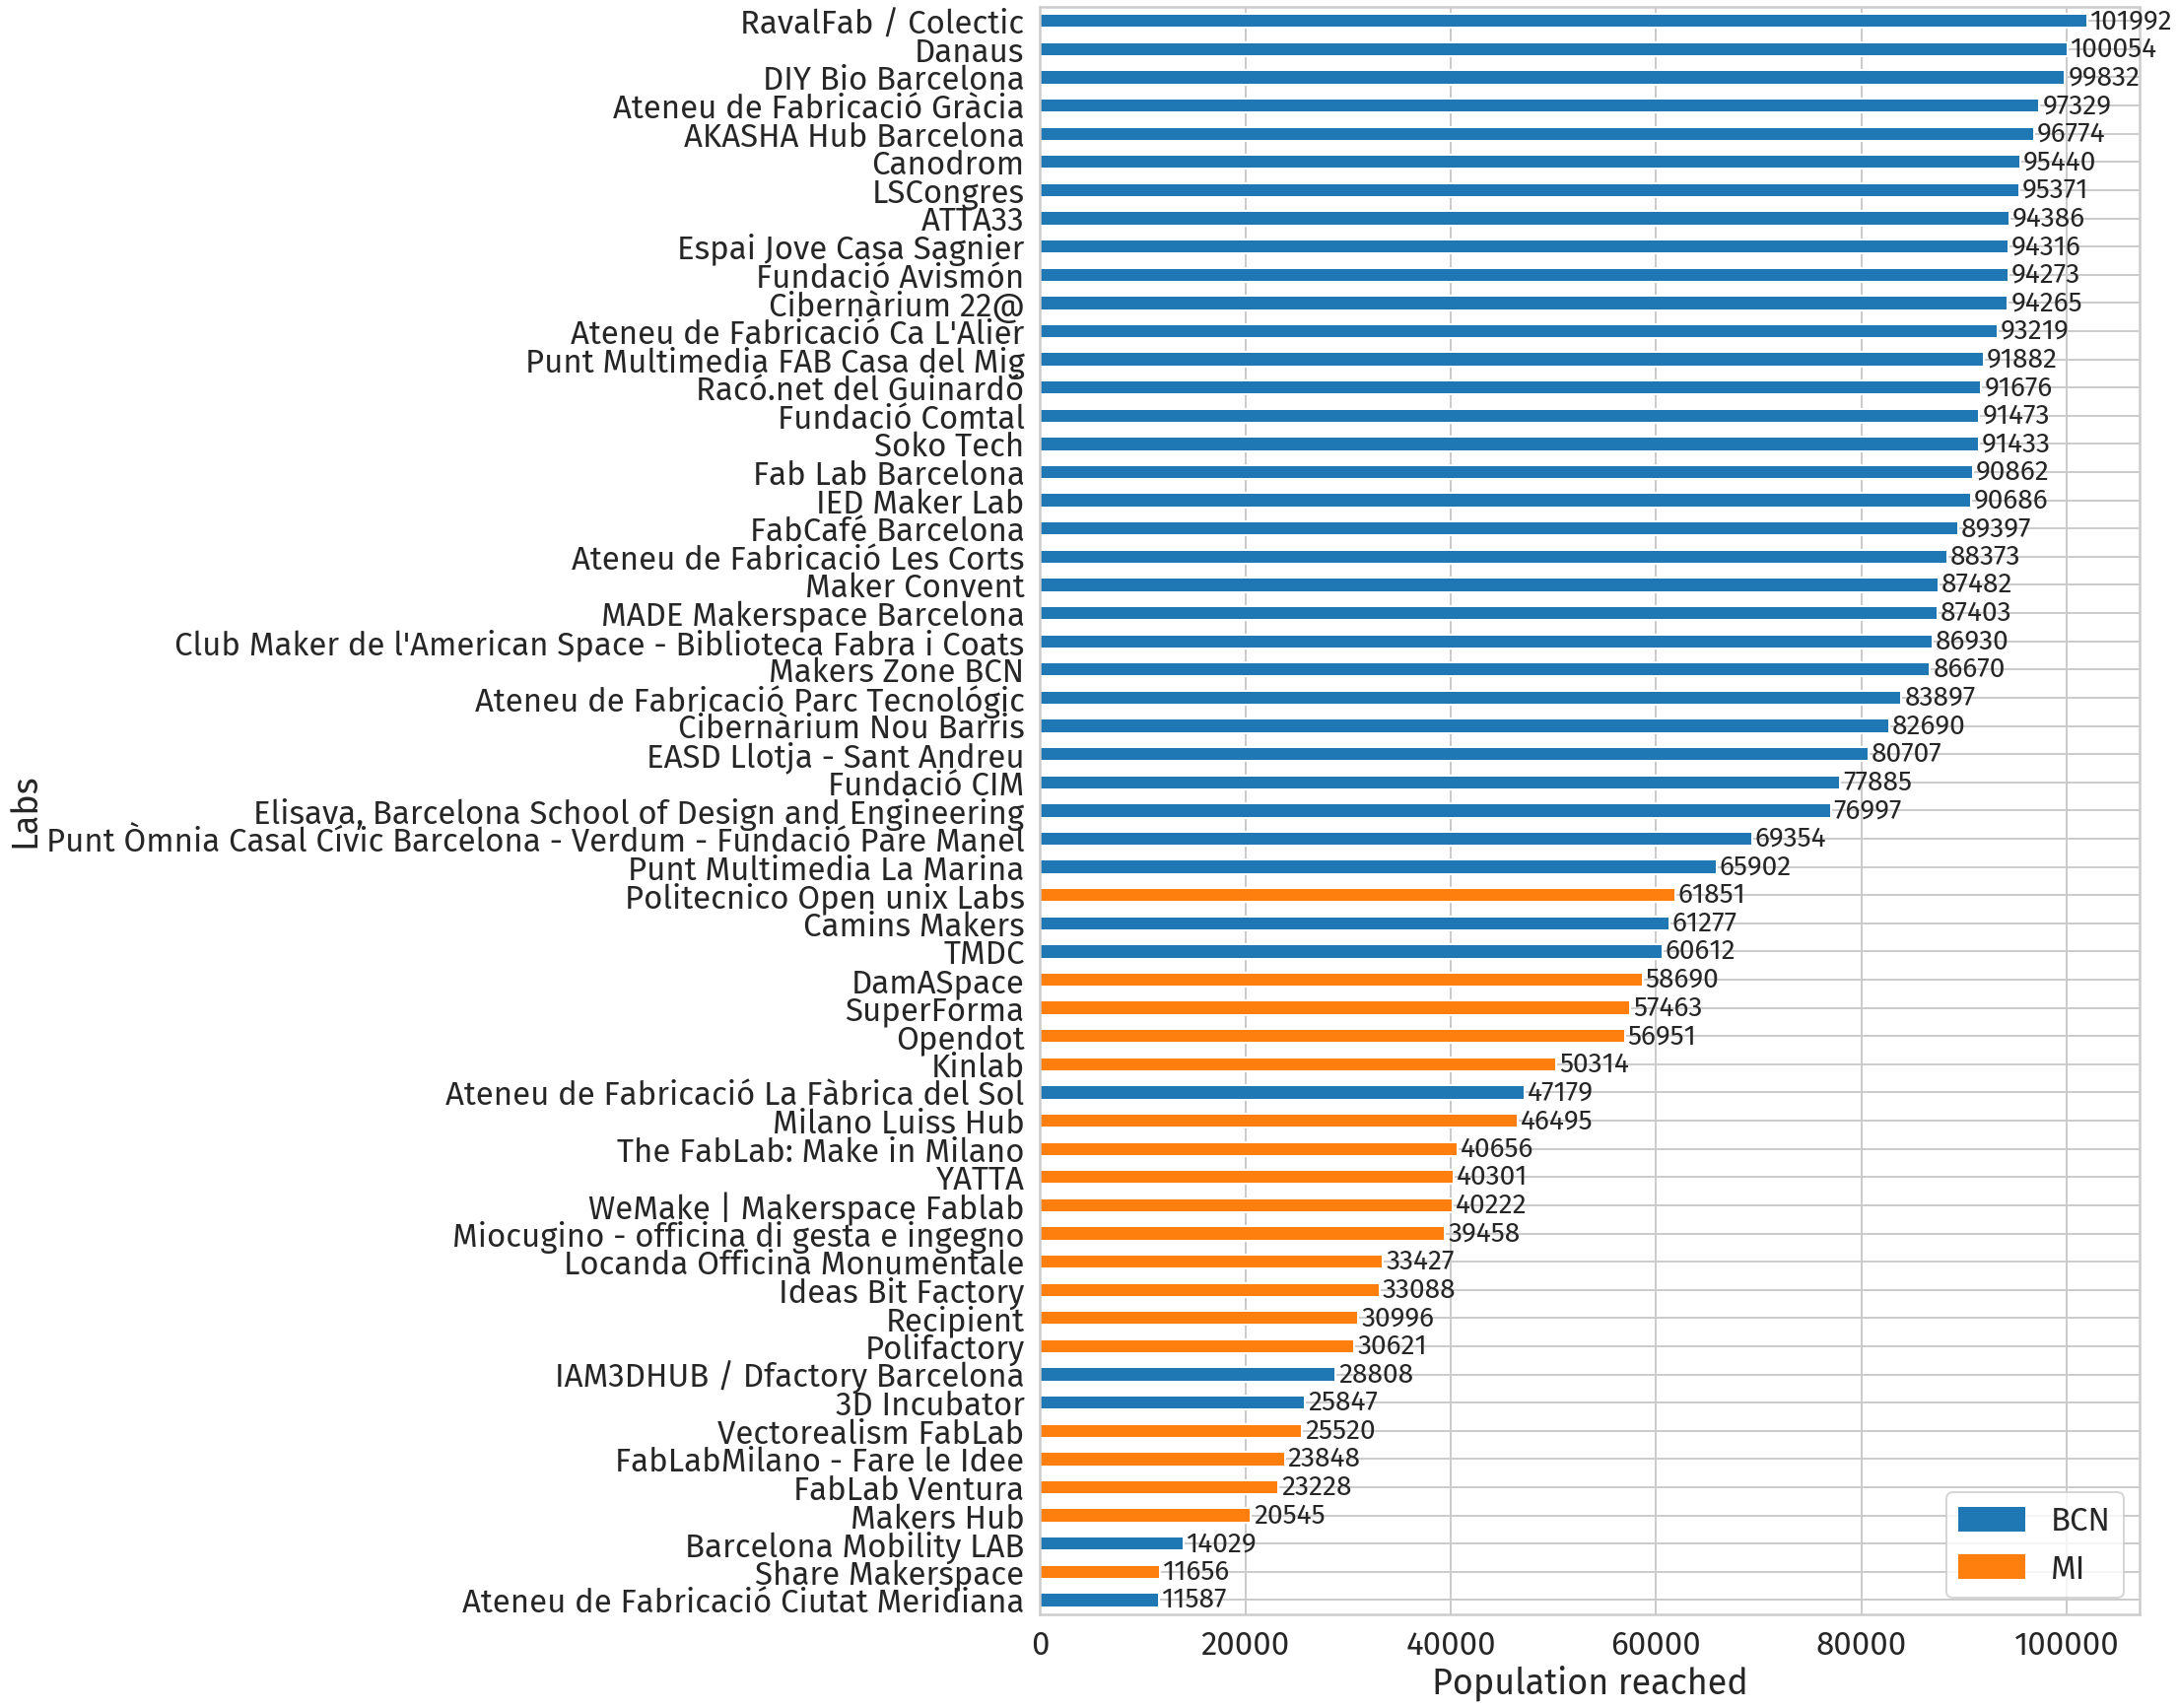

In [34]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

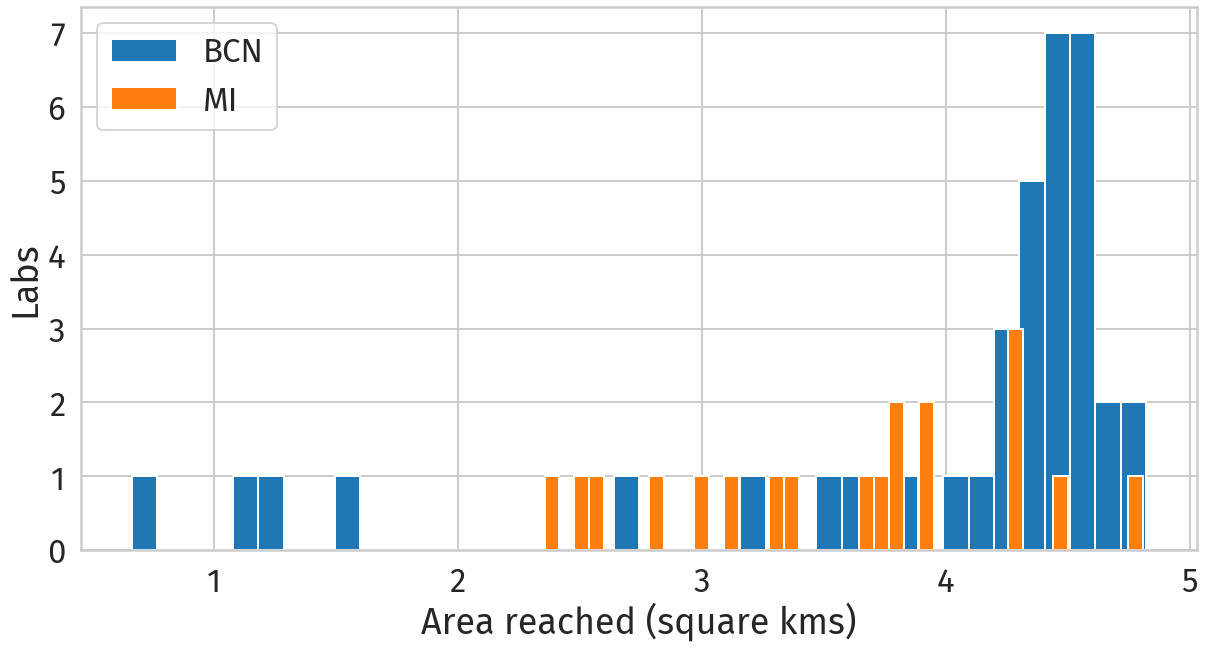

In [35]:
# Plot the data
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

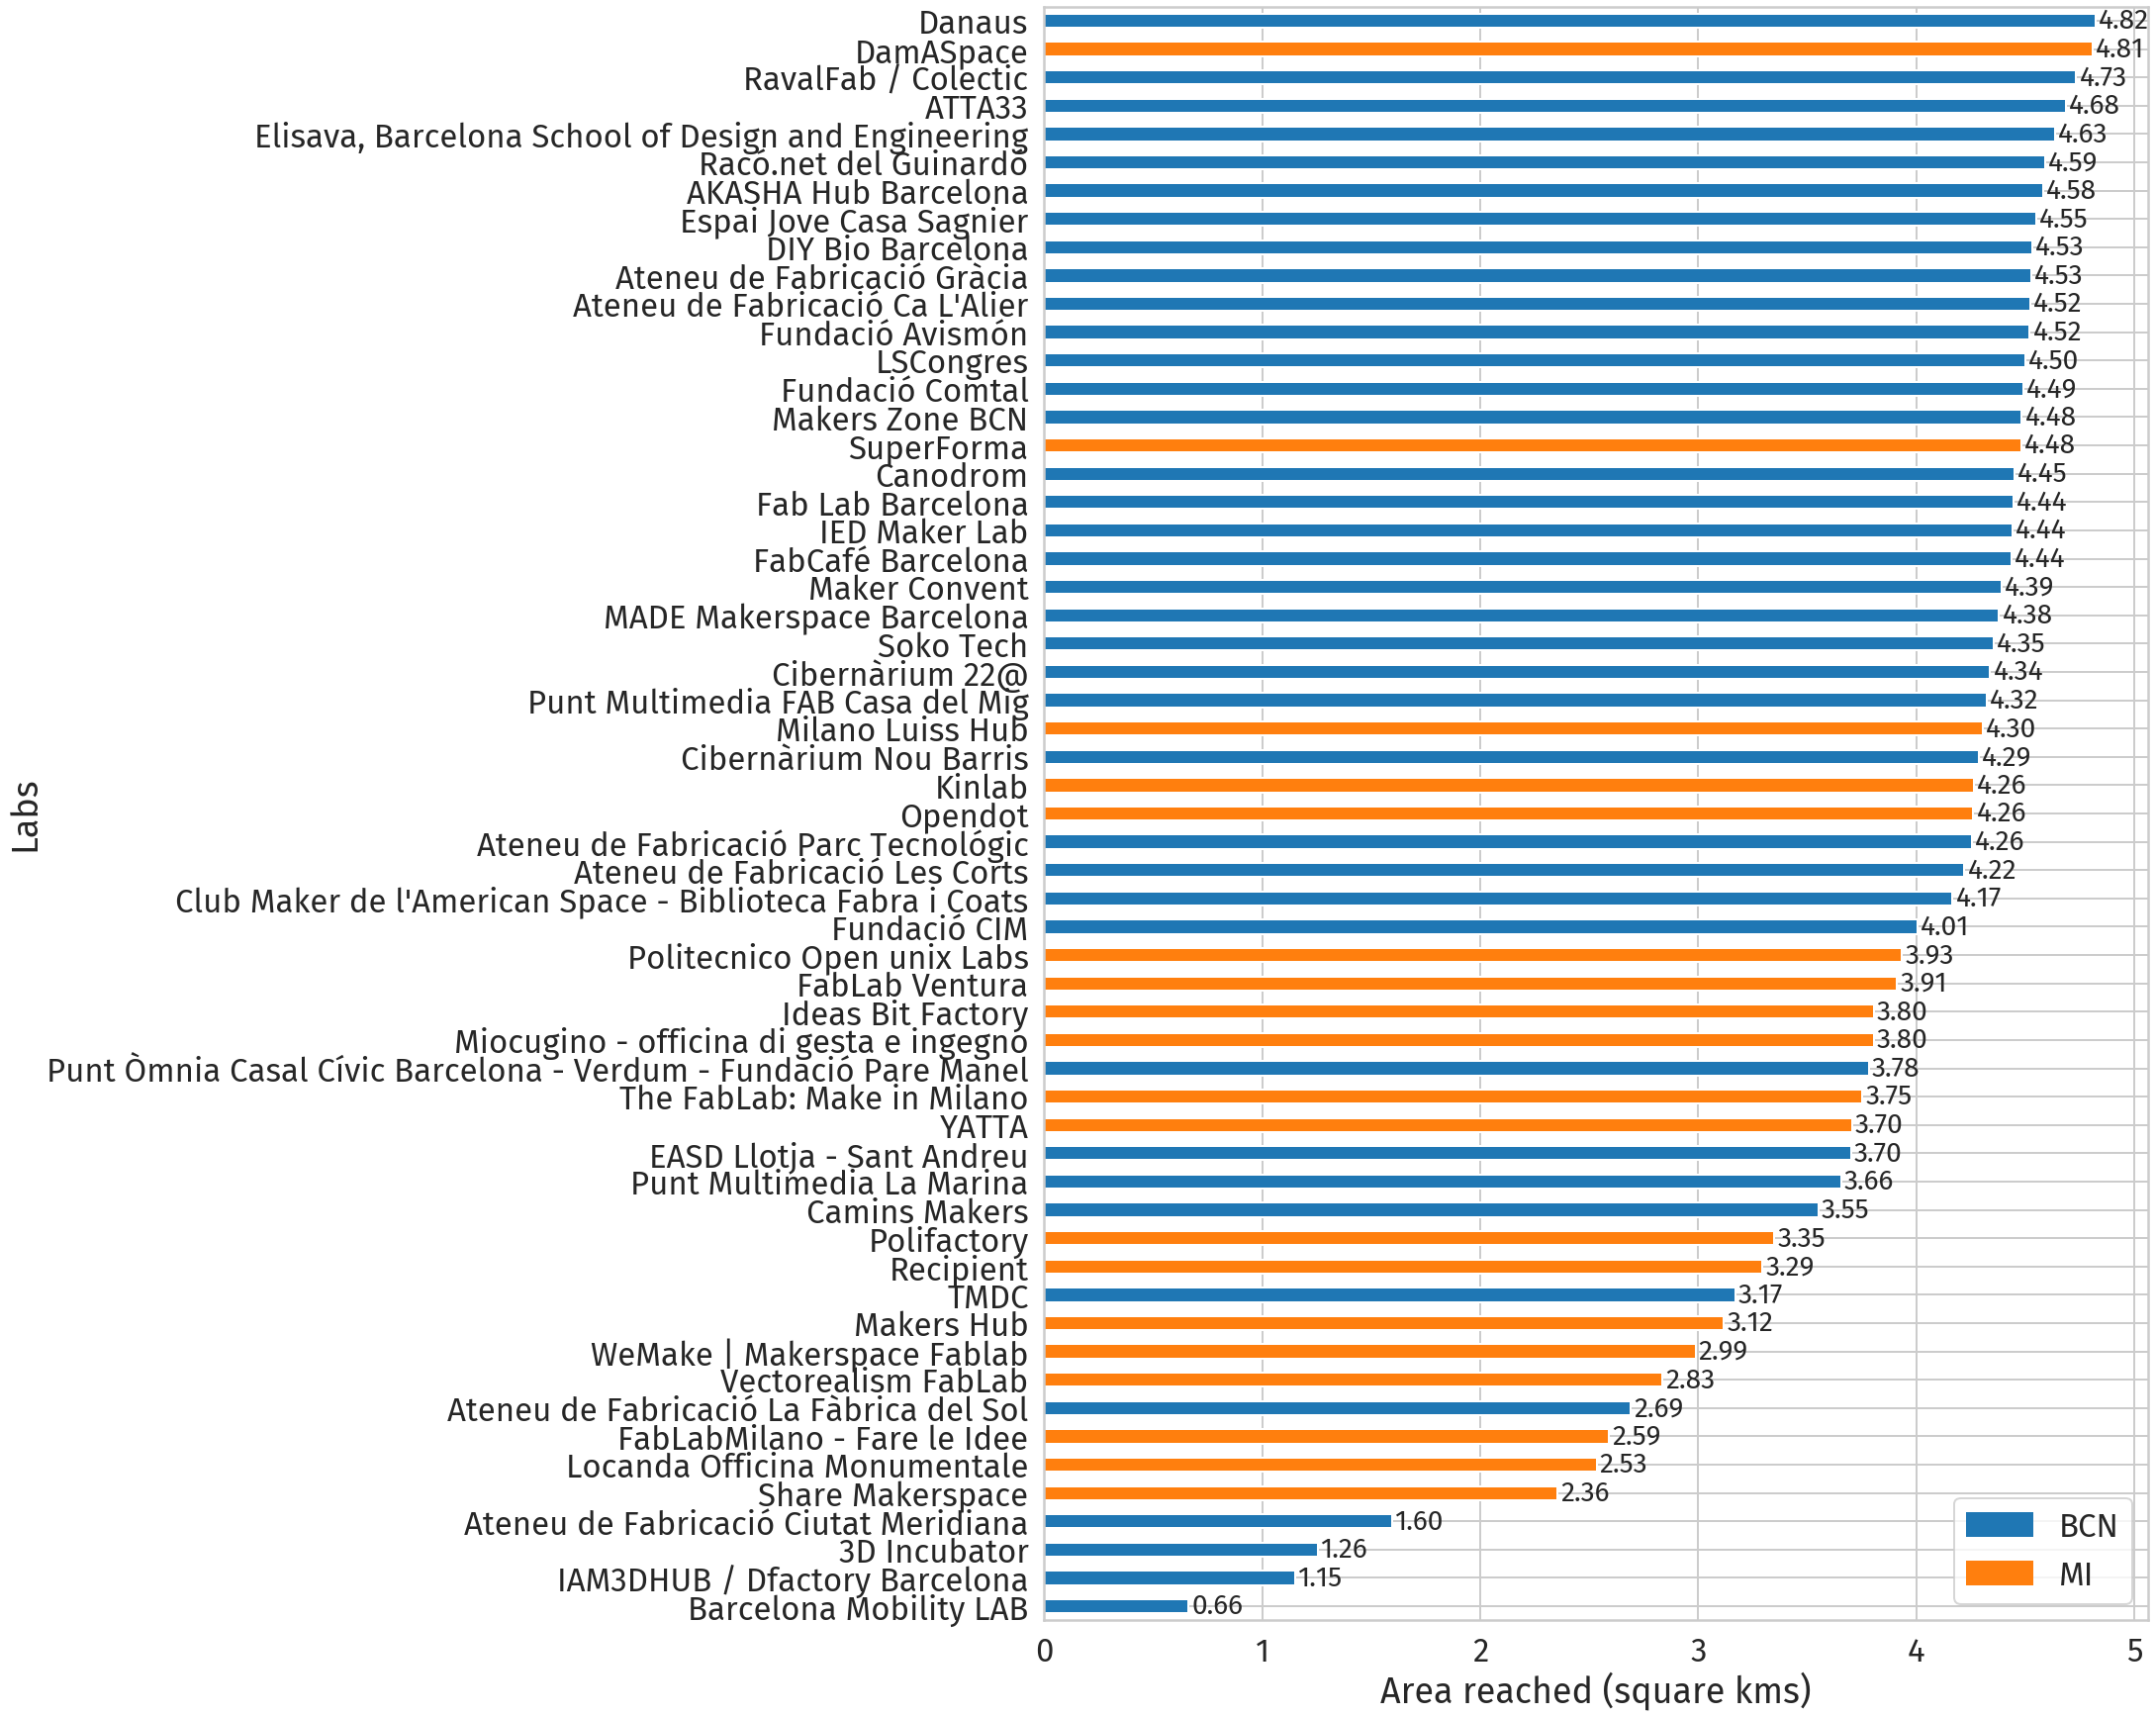

In [36]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

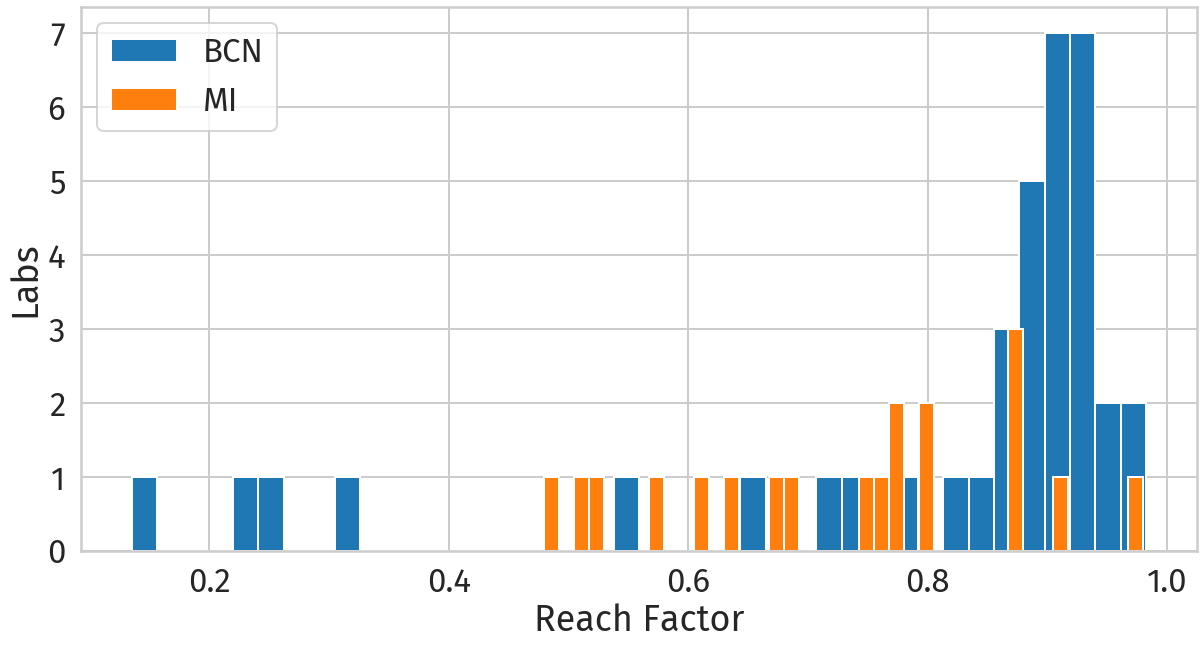

In [37]:
# Plot the data
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

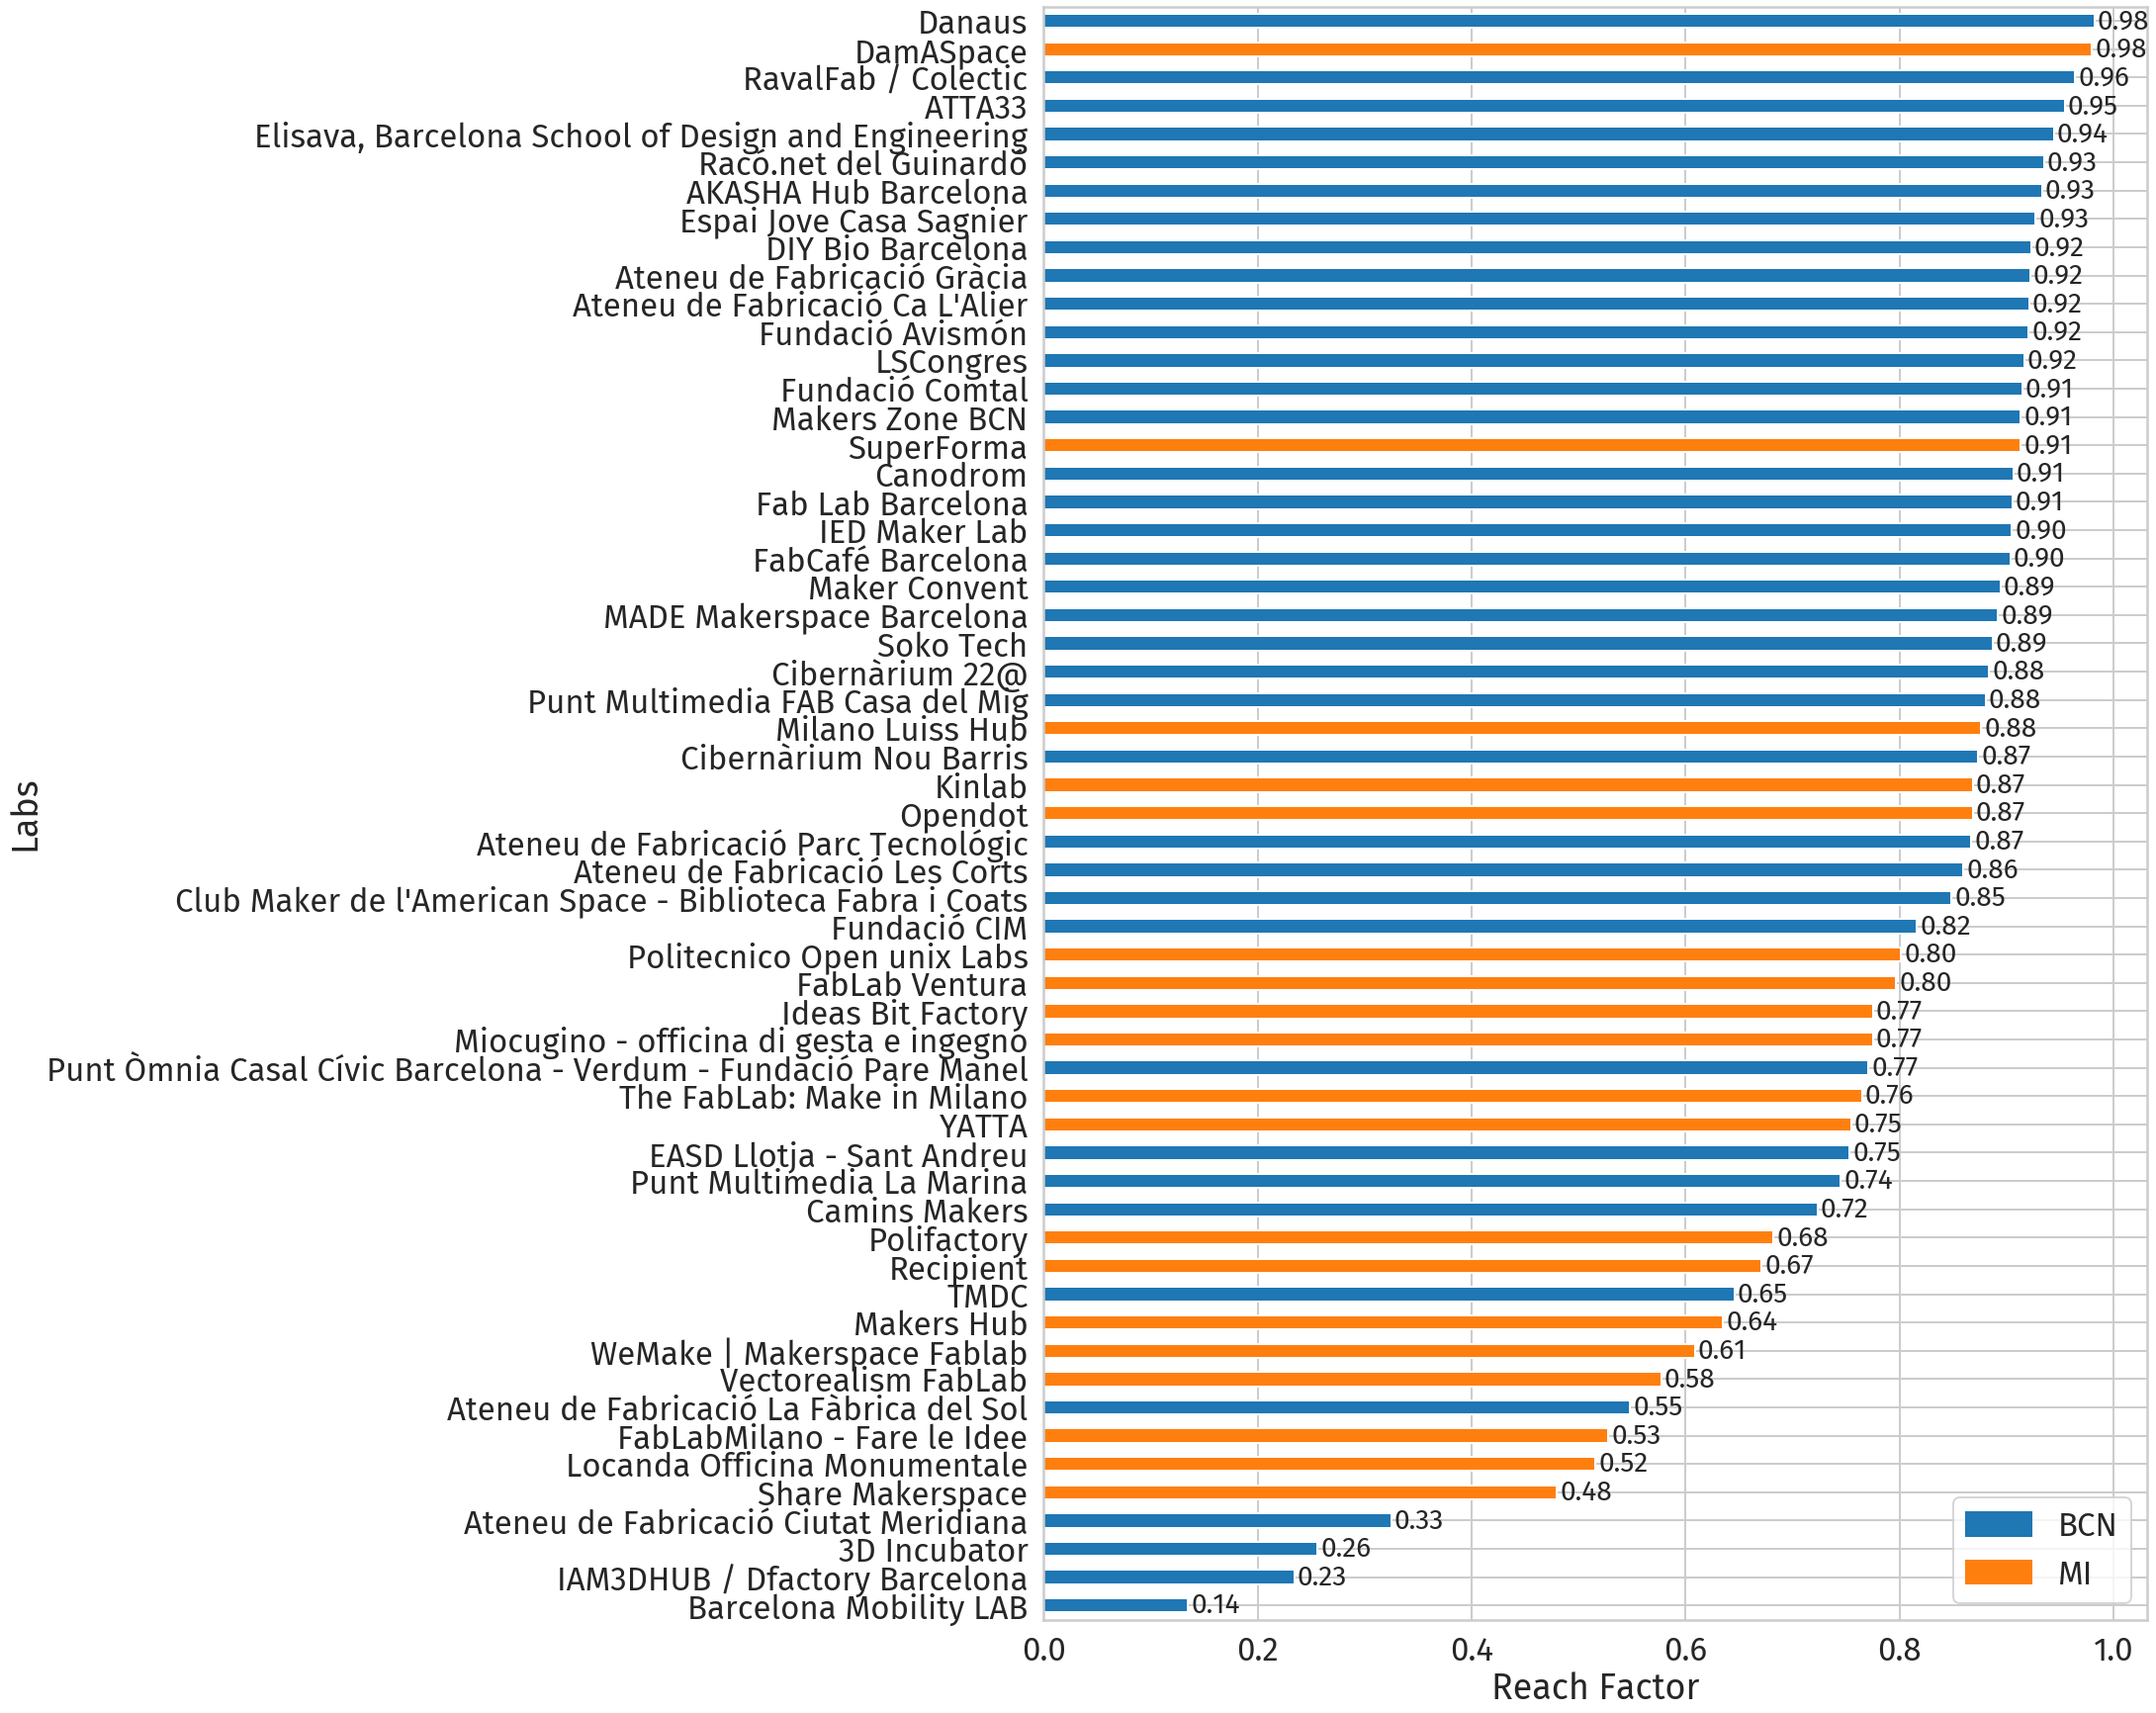

In [38]:
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/city_labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/city_labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

## Isochrones

In [39]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [40]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


In [41]:
folium.LayerControl().add_to(m)
m

In [42]:
m.save("html/city_isochrones.html")

## Isochrones with color from population reached

In [43]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

In [44]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [45]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [46]:
m.save("html/city_isochrones_popcolor.html")

In [47]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.75); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [48]:
m.save("html/city_isochrones_popcolor_labels.html")